理解随机过程的含义

赌博中的随机过程

赌博的例子非常普遍，这里我们举一个大家非常熟悉的例子，我们尽量挖掘的更深入一些。

赌徒和庄家对赌抛硬币，如果为正面，本轮赌徒赢，庄家付给赌徒1元，结果为反面，本轮赌徒输，赌徒付给庄家1元。赌徒有初始赌本10元，手上的钱一旦输光则退出赌局，如何来模拟这个赌博过程？

我们首先来分析一下这个过程，赌徒的赌博结果本质上依托于每次抛掷硬币的结果，每一轮赌博就是一个伯努利试验，赢的概率是p=0.5，赌博的过程就是由这一串伯努利试验构成的伯努利随机过程，每轮赌局中，如果赢则赌本增加1元，输则赌本减少1元。

当然了，如果对某一个特定的赌徒，一旦开始进入赌局，则最终由每轮赌局结果构成的序列就是唯一的。那么如果我们想观察整个赌博过程的整体特征，我们该怎么办？好办，还是使用之前讲过的蒙特卡罗方法，采用大量的样本，最终观察样本结果的整体特征。

这里，我们为了说明问题，先采用的样本数也就是赌徒数为10个，轮数为100轮，也就是每个赌徒最多和庄家对赌100轮，如果在这个过程中输光了赌本，则提前退出，如果到100轮还有赌本，赌局也停止。

我们来看一下模拟的代码：

In [1]:
import pandas as pd
import random

In [2]:


sample_list = []
round_num =100
person_num = 10
for person in range (1,person_num + 1):
    money = 10 #本金十块
    for round in range(1,round_num + 1):
        result = random.randint(0, 1) #随机输赢
        if result == 1:
            money = money + 1
        elif result == 0:
            money = money - 1
        if money == 0:
            break
    sample_list.append([person,round,money])


sample_df = pd.DataFrame(sample_list,columns = ['person','round','money'])
sample_df.set_index('person',inplace=True)


# print(sample_df)
pd.DataFrame(sample_df)

,round,money
person,,
1,100,22
2,100,16
3,24,0
4,34,0
5,100,18
6,100,24
7,100,22
8,24,0
9,100,14


我们简单的分析一些代码和运行结果，其实这段代码中最核心的部分就是：

result = random.randint(0, 1)

在每轮赌局中，我们首先生成了一个随机变量，他在0和1当中等概论选取，模拟的就是抛掷硬币的过程，当结果为1时表示硬币为正面，本轮赢庄家1元，结果为0时表示硬币为反面，本轮输庄家1元。这里设定的是每个赌徒最多赌100轮，如果不到100轮就输光了，则退场，这样就模拟了整个赌博的随机过程。

从运行结果来看，10个赌徒中有  个提前输光退场，剩下的 个打满全场的人中，有 个是挣钱的，有 个是亏钱的。

当然，我们这里是为了打印出所有的结果，所以样本数选择的比较少。蒙特卡洛方法讲求大的样本量，我们把样本数和轮数都修改一下，并且统计一些指标。我们把赌徒的总人数设置为1000000人，轮数设置为100（我们依次修改了轮数为100,1000,10000），来观察样本总体的表现：

代码片段：

In [3]:
import pandas as pd
import random

sample_list = []
person_num = 100000
round_num = 10000
for person in range(1, person_num + 1):
    money = 10
    for round in range(1, round_num + 1):
        result = random.randint(0, 1)
        if result == 1:
            money = money + 1
        elif result == 0:
            money = money - 1
        if money == 0:
            break
    sample_list.append([person, round, money])
sample_df = pd.DataFrame(sample_list, columns=['person', 'round', 'money'])
sample_df.set_index('person',inplace=True)

print("总轮数：{}，总人数{}".format(round_num,person_num))
print('输光读本提前出局的人数：{}'.format(person_num-len(sample_df[sample_df['round']==round_num])))
print("赌满全场且盈利的人数:{}".format(len(sample_df[sample_df['money']>10])))
print("赌满全场且亏损的人数:{}".format(len(sample_df[sample_df['money']<=10][sample_df['money']>0])))

总轮数：10000，总人数100000
输光读本提前出局的人数：92064
赌满全场且盈利的人数:7884
赌满全场且亏损的人数:51


/var/folders/bz/8yf5rf0s1yzd3gl6nw6xvclw0000gn/T/ipykernel_4411/958427531.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("赌满全场且亏损的人数:{}".format(len(sample_df[sample_df['money']<=10][sample_df['money']>0])))


从结果中不难发现，这种和庄家1:1的对赌，随着轮数的增加，基本上都破产被收割了。换句话说，哪怕庄家不出千，输赢概率各半，赌的越久，基本上都是输光破产走人，原因是什么？原因是庄家的资金量是无穷的。

2.2.模拟股价的变化

赌博的例子结束了，我们再举一个股票的例子，这个让人感觉都很心跳啊，在金融工程中，有下面 这样一个公式，他利用目前的股价 $S_{t}$ 去预测 $\Delta t$ 时间之后的股价 $S_{t+1}$ :
$$
S_{t+1}=S_{t}+\hat{\mu} S_{t} \Delta t+\sigma S_{t} \epsilon \sqrt{\Delta t}
$$
这其中的参数我来解释一下：
$\hat{\mu}$ 表示股票收益率的期望值，这里我们设定为 $15 \%,$ 即 $\hat{\mu}=0.15$
$\sigma$ 表示股票的波动率，这里设定为 $\sigma=0.2$
$\Delta t=\frac{T}{n},$ 其中 $T$ 表示整数年份, $n$ 表示在整个估算周期内，取的具体步数，就好比说 $T$ 为 一年, $n$ 如果取244，那么 $\Delta t$ 的粒度就是每个交易日了（一年有244个交易日）。


这里面似乎所有的参数都是确定的，唯独除了 $\epsilon$ 之外, $\epsilon$ 是一个服从标准正态分布的随机变量, 这是这个 $\epsilon,$ 决定了每日的股价 $S_{i}$ 是一个随机变量，而由股价构成的序列是一个随机过程。


我们同样的用蒙特卡罗方法，利用大样本来估计一下在目前股价为 $S_{0}=10$ 的情况下，1年之后股 价的概率分布情况。

In [4]:
import scipy
import matplotlib.pyplot as plt  #注意这里是.pyplot
import seaborn
from math import sqrt
% matplotlib.inline
seaborn.set()

UsageError: Line magic function `%` not found.


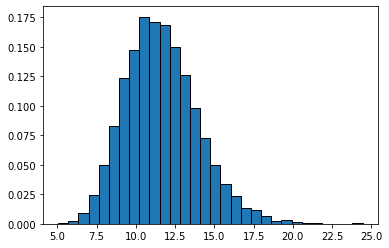

In [5]:
s0 = 10.0
T = 1.0
n = 244 * T
mu = 0.15
sigma = 0.2
n_simulation = 10000


dt = T/n
s_array = []

for i in range(n_simulation):
    s = s0
    for j in range(int(n)):
        e = scipy.random.normal()
        s = s+mu*s*dt+sigma*s*e*sqrt(dt)
    s_array.append(s)

plt.hist(s_array, bins=30, density=True, edgecolor='k')
plt.show()

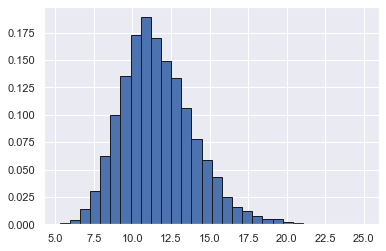

In [6]:
import scipy
import matplotlib.pyplot as plt
import seaborn
from math import sqrt
seaborn.set()

s0 = 10.0
T = 1.0
n = 244 * T
mu = 0.15
sigma = 0.2
n_simulation = 10000

dt = T/n
s_array = []

for i in range(n_simulation):
    s = s0
    for j in range(int(n)):
        e = scipy.random.normal()
        s = s+mu*s*dt+sigma*s*e*sqrt(dt)
    s_array.append(s)

plt.hist(s_array, bins=30, density=True, edgecolor='k')
plt.show()

$$ s = s+mu*s*dt+sigma*s*e*sqrt(dt) $$

$$
S_{t+1}=S_{t}+\hat{\mu} S_{t} \Delta t+\sigma S_{t} \epsilon \sqrt{\Delta t}
$$

这是我们模拟了10000个样本经过上述随机过程，在一年之后股价的分布情况。

这里的核心就是：

 e = scipy.random.normal()
 
 s = s+mu*s*dt+sigma*s*e*sqrt(dt)

每一轮 $\Delta t$ ，我们都生成一个服从标准正态分布的随机变量 $\epsilon,$ 不断通过递推公式 $S_{t+1}=S_{t}+\hat{\mu} S_{t} \Delta t+\sigma S_{t} \epsilon \sqrt{\Delta t},$ 迭代出下一个时间点的股价，循环往复直到生成一年后的
最终结果，这样就模拟出了一年过程中股价随机变量序列构成的随机过程。

我们采用蒙特卡罗方法，设置大样本量（这里设置10000个），最终迭代出10000个对应的一年后股价，然后用柱状图就能看出其总体分布特征。

2.3.股价变化曲线的过程展现

上面我们分析的是这10000个样本在一年之后最终股价的整体分布情况，实际上我们还有一个同样 重要的过程可以进行监测和展现，那就是从 $T_{0}$ 时刻起到1年后的这一段时间内，每隔 $\Delta t$ 时间间 隔点由实时价格随机变量构成的序列，换句话说就是随机过程的整体展现。
这个在上面的基础上进一步完成，其实不难，就是我们不光要计算出股票最终的价格，还有记录下 每个 $\Delta t$ 时间点的价格，并把他记录下来。
代码片段：

In [7]:
import scipy
import matplotlib.pyplot as plt
import seaborn
from math import sqrt
import numpy as np
seaborn.set()

s0 = 10.0
T = 1.0
n = 244 * T
mu = 0.15
sigma = 0.2
n_simulation = 100

dt = T/n

random_series = np.zeros(int(n),dtype=float)
x = range(0,int(n))

for i in range(n_simulation):
    random_series[0]=s0
    for j in range(1,int(n)):
        e.scipy.random.normal()
        random_series[j] = random_series[j-1]+ mu*random_series[j-1]*dt+sigma*random_series[j-1]*e*sqrt(dt)
    ply.plot(x,random_series)



AttributeError: 'float' object has no attribute 'scipy'

In [ ]:
import scipy
import matplotlib.pyplot as plt
import seaborn
from math import sqrt
import numpy as np
seaborn.set()

s0 = 10.0
T = 1.0
n = 244 * T
mu = 0.15
sigma = 0.2
n_simulation = 100

dt = T/n
random_series = np.zeros(int(n), dtype=float)
x = range(0, int(n))

for i in range(n_simulation):
    random_series[0] = s0
    for j in range(1,int(n)):
        e = scipy.random.normal()
        random_series[j] = random_series[j-1]+mu*random_series[j-1]*dt+sigma*random_series[j-1]*e*sqrt(dt)
    plt.plot(x, random_series)

plt.show()